In [99]:
import numpy as np
import matplotlib.pyplot as plt
from colorama import Fore, Style

# Input parameters
batch_size = 32
seq_length = 10

d_model = 64
d_key_value = 64

num_heads = 8

def generate_random_array(batch_size, seq_length, d_model):
    return np.random.randn(batch_size, seq_length, d_model)

def plot_attention_heatmaps(attention_scores, title):
    fig, axes = plt.subplots(batch_size, num_heads, figsize=(16, int(batch_size * 2.5)))
    fig.suptitle(title, fontsize=18)

    for row in range(batch_size):
        for col in range(num_heads):
            heatmap = axes[row, col].imshow(attention_scores[row, col])
            axes[row, col].set_title(f'Head {col+1}, Sentence {row+1}')
            fig.colorbar(heatmap, ax=axes[row, col], fraction=0.046, pad=0.04)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [100]:
# Generate input matrix (X)
X = generate_random_array(batch_size, seq_length, d_model)
print(f'{Fore.GREEN}Input Matrix (X) shape: {X.shape}{Style.RESET_ALL}\n')

print(
    f'{Fore.YELLOW}=== Linear Transformations for Q, K, and V ==={Style.RESET_ALL}\n'
)
print(
    f'{Fore.MAGENTA}Linear transformations are applied to create Query (Q), Key (K),'
    f' and Value (V) matrices\nfor the attention mechanism. Separate weight matrices WQ, WK,'
    f' and WV are used for each\ntransformation.{Style.RESET_ALL}\n')

# Linear transformations for Q, K, and V
WQ = np.random.randn(d_model, d_key_value)
WK = np.random.randn(d_model, d_key_value)
WV = np.random.randn(d_model, d_key_value)

print(f'{Fore.CYAN}Creating weight matrix for Query (WQ)')
print(f'WQ shape: {WQ.shape}')
print(
    f'WQ will be used to transform the input matrix (X) into the Query (Q) matrix.{Style.RESET_ALL}\n'
)

print(f'{Fore.CYAN}Creating weight matrix for Key (WK)')
print(f'WK shape: {WK.shape}')
print(
    f'WK will be used to transform the input matrix (X) into the Key (K) matrix.{Style.RESET_ALL}\n'
)

print(f'{Fore.CYAN}Creating weight matrix for Value (WV)')
print(f'WV shape: {WV.shape}')
print(
    f'WV will be used to transform the input matrix (X) into the Value (V) matrix.{Style.RESET_ALL}\n'
)


Input Matrix (X) shape: (32, 10, 64)

=== Linear Transformations for Q, K, and V ===

Linear transformations are applied to create Query (Q), Key (K), and Value (V) matrices
for the attention mechanism. Separate weight matrices WQ, WK, and WV are used for each
transformation.

Creating weight matrix for Query (WQ)
WQ shape: (64, 64)
WQ will be used to transform the input matrix (X) into the Query (Q) matrix.

Creating weight matrix for Key (WK)
WK shape: (64, 64)
WK will be used to transform the input matrix (X) into the Key (K) matrix.

Creating weight matrix for Value (WV)
WV shape: (64, 64)
WV will be used to transform the input matrix (X) into the Value (V) matrix.



In [101]:
print(f'{Fore.CYAN}Weight matrix for Query (WQ) shape: {WQ.shape}')
print(f'Weight matrix for Key (WK) shape: {WK.shape}')
print(f'Weight matrix for Value (WV) shape: {WV.shape}{Style.RESET_ALL}\n')

print(f'{Fore.MAGENTA}Matrix multiplication: X * WQ = Q')
print(
    f'This multiplication transforms the input matrix (X) into the Query (Q) matrix.'
)
Q = np.matmul(X, WQ)
print(f'Input shapes: X ({X.shape}), WQ ({WQ.shape})')
print(f'Output shape: Q ({Q.shape}){Style.RESET_ALL}\n')

print(f'{Fore.MAGENTA}Matrix multiplication: X * WK = K')
print(
    f'This multiplication transforms the input matrix (X) into the Key (K) matrix.'
)
K = np.matmul(X, WK)
print(f'Input shapes: X ({X.shape}), WK ({WK.shape})')
print(f'Output shape: K ({K.shape}){Style.RESET_ALL}\n')

print(f'{Fore.MAGENTA}Matrix multiplication: X * WV = V')
print(
    f'This multiplication transforms the input matrix (X) into the Value (V) matrix.'
)
V = np.matmul(X, WV)
print(f'Input shapes: X ({X.shape}), WV ({WV.shape})')
print(f'Output shape: V ({V.shape}){Style.RESET_ALL}\n')


Weight matrix for Query (WQ) shape: (64, 64)
Weight matrix for Key (WK) shape: (64, 64)
Weight matrix for Value (WV) shape: (64, 64)

Matrix multiplication: X * WQ = Q
This multiplication transforms the input matrix (X) into the Query (Q) matrix.
Input shapes: X ((32, 10, 64)), WQ ((64, 64))
Output shape: Q ((32, 10, 64))

Matrix multiplication: X * WK = K
This multiplication transforms the input matrix (X) into the Key (K) matrix.
Input shapes: X ((32, 10, 64)), WK ((64, 64))
Output shape: K ((32, 10, 64))

Matrix multiplication: X * WV = V
This multiplication transforms the input matrix (X) into the Value (V) matrix.
Input shapes: X ((32, 10, 64)), WV ((64, 64))
Output shape: V ((32, 10, 64))



In [102]:
print(
    f'{Fore.YELLOW}=== Splitting Q, K, and V into Multiple Heads ==={Style.RESET_ALL}\n'
)
print(
    f'{Fore.MAGENTA}Q, K, and V are split into multiple heads to allow the model to attend to different parts of the input simultaneously. \nThis helps the model to capture different aspects of the input more effectively.{Style.RESET_ALL}\n'
)

print(
    f'{Fore.MAGENTA}Reshaping and transposing Q to create the split Query matrices.'
)
Q_split = np.reshape(Q, (batch_size, seq_length, num_heads,
                         d_key_value // num_heads)).transpose(0, 2, 1, 3)
print(f'{Fore.CYAN}Split Query (Q) shape: {Q_split.shape}{Style.RESET_ALL}\n')

print(
    f'{Fore.MAGENTA}Reshaping and transposing K to create the split Key matrices.'
)
K_split = np.reshape(K, (batch_size, seq_length, num_heads,
                         d_key_value // num_heads)).transpose(0, 2, 1, 3)
print(f'{Fore.CYAN}Split Key (K) shape: {K_split.shape}{Style.RESET_ALL}\n')

print(
    f'{Fore.MAGENTA}Reshaping and transposing V to create the split Value matrices.'
)
V_split = np.reshape(V, (batch_size, seq_length, num_heads,
                         d_key_value // num_heads)).transpose(0, 2, 1, 3)
print(f'{Fore.CYAN}Split Value (V) shape: {V_split.shape}{Style.RESET_ALL}\n')


=== Splitting Q, K, and V into Multiple Heads ===

Q, K, and V are split into multiple heads to allow the model to attend to different parts of the input simultaneously. 
This helps the model to capture different aspects of the input more effectively.

Reshaping and transposing Q to create the split Query matrices.
Split Query (Q) shape: (32, 8, 10, 8)

Reshaping and transposing K to create the split Key matrices.
Split Key (K) shape: (32, 8, 10, 8)

Reshaping and transposing V to create the split Value matrices.
Split Value (V) shape: (32, 8, 10, 8)



In [103]:
print(
    f'{Fore.YELLOW}=== Computing Scaled Dot-Product Attention ==={Style.RESET_ALL}\n'
)
print(
    f'{Fore.MAGENTA}Scaled Dot-Product Attention is computed to determine how much focus should be placed on each word in the input sequence. \nIt calculates attention scores based on the similarity between Query (Q) and Key (K) matrices,\nand then applies the softmax function to get the attention probabilities.{Style.RESET_ALL}\n'
)

print(
    f'{Fore.MAGENTA}Computing attention scores by performing a dot product between Q and K, and scaling by the square root of the key dimension.'
)
attention_scores = np.matmul(Q_split, K_split.transpose(0, 1, 3, 2)) / np.sqrt(
    d_key_value // num_heads)
print(
    f'{Fore.CYAN}Attention scores shape: {attention_scores.shape}{Style.RESET_ALL}\n'
)

print(
    f'{Fore.MAGENTA}Applying softmax function to convert attention scores into attention probabilities.'
)
attention_probs = np.exp(attention_scores -
                         np.max(attention_scores, axis=-1, keepdims=True))
attention_probs /= np.sum(attention_probs, axis=-1, keepdims=True)
print(
    f'{Fore.CYAN}Attention probabilities shape: {attention_probs.shape}{Style.RESET_ALL}\n'
)


=== Computing Scaled Dot-Product Attention ===

Scaled Dot-Product Attention is computed to determine how much focus should be placed on each word in the input sequence. 
It calculates attention scores based on the similarity between Query (Q) and Key (K) matrices,
and then applies the softmax function to get the attention probabilities.

Computing attention scores by performing a dot product between Q and K, and scaling by the square root of the key dimension.
Attention scores shape: (32, 8, 10, 10)

Applying softmax function to convert attention scores into attention probabilities.
Attention probabilities shape: (32, 8, 10, 10)



In [104]:
# Compute the attention output
attention_output = np.matmul(attention_probs, V_split)
print(
    f'{Fore.CYAN}Attention Output shape: {attention_output.shape}{Style.RESET_ALL}\n'
)
print(
    f'{Fore.MAGENTA}Attention output is computed by multiplying attention probabilities with the split Value (V) matrix.\nThe result is an output matrix with weighted information from the input sequence.{Style.RESET_ALL}\n'
)

print(
    f'{Fore.YELLOW}=== Concatenating and Linear Transformation ==={Style.RESET_ALL}\n'
)
print(
    f'{Fore.MAGENTA}The attention outputs from all heads are concatenated, then passed through a linear transformation.\nThe final Multi-Head Attention Output is used as input for the next layer in the model.{Style.RESET_ALL}\n'
)

print(f'{Fore.MAGENTA}Concatenating attention outputs from all heads.')
attention_output_concat = np.reshape(attention_output.transpose(0, 2, 1, 3),
                                     (batch_size, seq_length, d_key_value))
print(
    f'{Fore.CYAN}Concatenated attention output shape: {attention_output_concat.shape}{Style.RESET_ALL}\n'
)

print(
    f'{Fore.MAGENTA}Creating the weight matrix for the final linear transformation (WO).'
)
WO = np.random.randn(d_model, d_model)
print(
    f'{Fore.CYAN}Weight matrix for final linear transformation (WO) shape: {WO.shape}{Style.RESET_ALL}\n'
)

print(
    f'{Fore.MAGENTA}Applying the final linear transformation to the concatenated attention output.'
)
multi_head_attention_output = np.matmul(attention_output_concat, WO)
print(
    f'{Fore.GREEN}Multi-Head Attention Output shape: {multi_head_attention_output.shape}{Style.RESET_ALL}\n'
)


Attention Output shape: (32, 8, 10, 8)

Attention output is computed by multiplying attention probabilities with the split Value (V) matrix.
The result is an output matrix with weighted information from the input sequence.

=== Concatenating and Linear Transformation ===

The attention outputs from all heads are concatenated, then passed through a linear transformation.
The final Multi-Head Attention Output is used as input for the next layer in the model.

Concatenating attention outputs from all heads.
Concatenated attention output shape: (32, 10, 64)

Creating the weight matrix for the final linear transformation (WO).
Weight matrix for final linear transformation (WO) shape: (64, 64)

Applying the final linear transformation to the concatenated attention output.
Multi-Head Attention Output shape: (32, 10, 64)



=== Multi-Head Attention Completed ===

Multi-Head Attention has successfully processed the input data, and the final output is ready to be used in the next layer of the model. 
Now, we will visualize the attention scores to understand how the model is attending to different parts of the input sequence for each head.



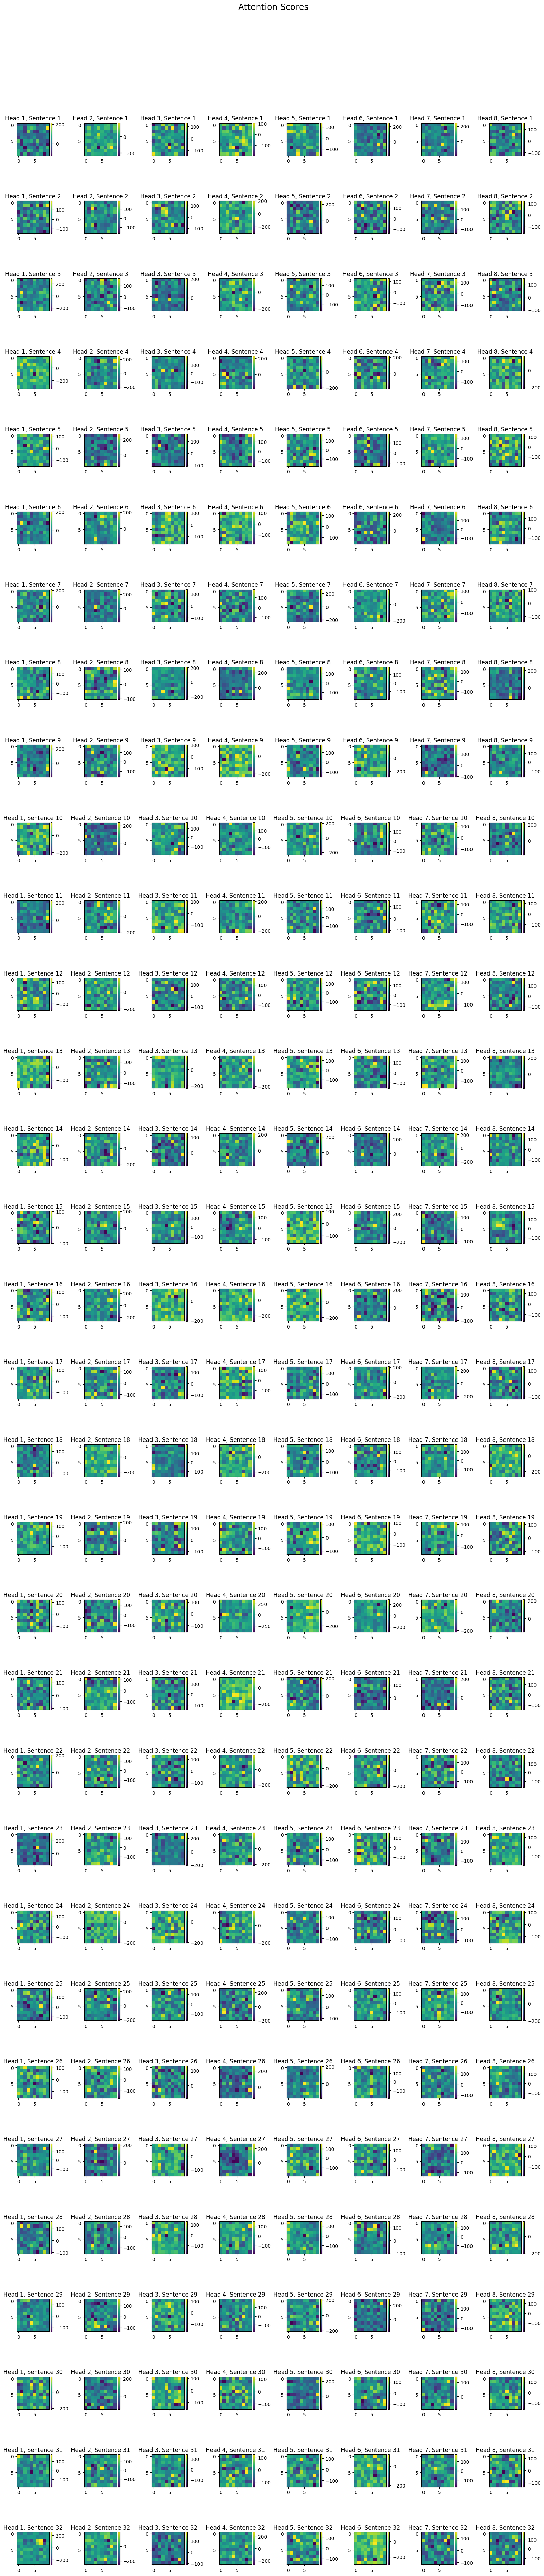

In [105]:
print(
    f'{Fore.YELLOW}=== Multi-Head Attention Completed ==={Style.RESET_ALL}\n')
print(
    f'{Fore.MAGENTA}Multi-Head Attention has successfully processed the input data, and the final output is ready to be used in the next layer of the model. \nNow, we will visualize the attention scores to understand how the model is attending to different parts of the input sequence for each head.{Style.RESET_ALL}\n'
)

# Visualize the attention scores for all heads and sentences in the batch
plot_attention_heatmaps(attention_scores, 'Attention Scores')
